In [364]:
def test_primalite(n):
    for i in range(2,int(n**(1/2))+1):
        if n%2 == 0:
            return False
        elif n%i ==0 :
            return False
    return True

def creation_q(bits):
    q = randint(2**(bits-1),2**bits)
    while test_primalite(q):
        q = randint(2**64,2**65)
    return q

def test_copremier(a,b):
    if xgcd(a,b)[0] == 1 :
        return True
    else :
        return False
    
def creation_cle(p):
    a = randint(p/2,p)
    return a

def double_add(P,d):
    while d != 1 :
        if d%2 == 0:
            P = 2*P
            d = int(d/2)
        else : 
            P = P + P
            d = d-1
    return P

def add(P,d):
    while d != 1 :
        P += P
        d -= 1
    return P


In [334]:
#EC Elgamal
def crea_cle(coef,bits):
    q = creation_q(bits)
    F = Zmod(next_prime(q))
    E = EllipticCurve(F,coef)
    a = randint(1,next_prime(E.order()))
    P = E.random_point()
    A = double_add(P,a)
    return (E,P,A),a

def decrypt(sk,C):
    return C[1] - double_add(C[0],sk)

def encrypt(pk,M):
    # pk = (E,P,A)
    E,P,A = pk
    k = randint(1,next_prime(E.order()))
    c1 = double_add(P,k)
    c2 = double_add(A,k) + M
    return (c1,c2)
    
pk,sk = crea_cle([1,0],128)

M = pk[0].random_point()
print(M)
C = encrypt(pk,M)
M1 = decrypt(sk,C)
print(M1)
print(M == M1)


(46956808927535462313181035052425795299 : 76286053461877658130578545408719407963 : 1)
(46956808927535462313181035052425795299 : 76286053461877658130578545408719407963 : 1)
True


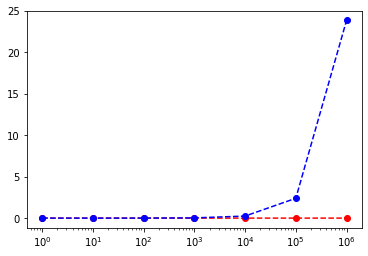

In [370]:
#Comparaison addition et double_add
import time
import matplotlib.pyplot as plt

P = E.random_point()
L = [10**i for i in range (0,7)]
delta1 = []
delta2 = []
for p in L :
    t0 = time.time()
    double_add(P,p)
    delta1.append(time.time() - t0)
    
    t0 = time.time()
    K = add(P,p)
    delta2.append(time.time() - t0)

plt.plot(L,delta1,'ro--',label = 'Double_add')
plt.plot(L,delta2,'bo--',label = 'Naïf')
plt.xscale('log')